Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
# Import data
data = pd.read_csv('learningSet.csv')
data.head()


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [4]:
# Describe the data, also for later
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


Data Cleaning

In [5]:
# Standardize column names
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(2)

,odatedw,osource,tcode,state,zip,mailcode,pvastate,dob,noexch,recinhse,...,target_d,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A


In [6]:
# Check for Null values in all columns
data.isna().sum()

odatedw       0
osource       0
tcode         0
state         0
zip           0
           ... 
mdmaud_r      0
mdmaud_f      0
mdmaud_a      0
cluster2    132
geocode2    132
Length: 481, dtype: int64

In [7]:
# Create an empty list of column names to drop later

# Adding Osource => Too many single values
# Adding ZIP => we are inlcuding the state already
drop_list = []
drop_list.extend(['osource', 'zip'])

In [16]:
# Displaying Percentages of nulls in each column
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(50)

,percentage
ramnt_11,84.551209
rdate_11,84.551209
ramnt_19,83.359535
rdate_19,83.359535
rdate_9,82.461326
ramnt_9,82.461326
ramnt_24,81.409047
rdate_24,81.409047
ramnt_18,79.270951
rdate_18,79.270951


In [17]:
# Keeping columns with less than 85% of nulls
drop_list2 = list(nulls[nulls['percentage'] > 85].index)
drop_list.extend(drop_list2)

In [ ]:
# Remove above columns from data
data = data.drop(columns=drop_list)

In [20]:
# find numerical and categorical data
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(include=np.object)

In [21]:
cat_data

,state,mailcode,pvastate,noexch,recinhse,recp3,recpgvg,recsweep,mdmaud,domain,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,IL,,,0,,,,,XXXX,T2,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,,,0,,,,,XXXX,S1,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,NC,,,0,,,,,XXXX,R2,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,,,0,,,,,XXXX,R2,...,A1D,A1D,,,L,E,X,X,X,C
4,FL,,,0,X,X,,,XXXX,S2,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,AK,,,0,,,,,XXXX,C2,...,,,,,L,G,X,X,X,C
95408,TX,,,0,,,,,XXXX,C1,...,,,,,L,F,X,X,X,A
95409,MI,,,0,,X,,,XXXX,C3,...,P1D,P1D,,,L,E,X,X,X,B
95410,CA,,,0,X,,,,XXXX,C1,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [22]:
# find categoricals with nans
categoricals_with_nans = []
for col in cat_data.columns:
    if cat_data.isna().sum().any() and col in cat_data.columns.tolist():
        categoricals_with_nans.append(col)

print(categoricals_with_nans)

['state', 'mailcode', 'pvastate', 'noexch', 'recinhse', 'recp3', 'recpgvg', 'recsweep', 'mdmaud', 'domain', 'cluster', 'ageflag', 'homeownr', 'child03', 'child07', 'child12', 'child18', 'gender', 'datasrce', 'solp3', 'solih', 'major', 'geocode', 'collect1', 'veterans', 'bible', 'catlg', 'homee', 'pets', 'cdplay', 'stereo', 'pcowners', 'photo', 'crafts', 'fisher', 'gardenin', 'boats', 'walker', 'kidstuff', 'cards', 'plates', 'lifesrc', 'pepstrfl', 'rfa_2', 'rfa_3', 'rfa_4', 'rfa_5', 'rfa_6', 'rfa_7', 'rfa_8', 'rfa_9', 'rfa_10', 'rfa_11', 'rfa_12', 'rfa_13', 'rfa_14', 'rfa_15', 'rfa_16', 'rfa_17', 'rfa_18', 'rfa_19', 'rfa_20', 'rfa_21', 'rfa_22', 'rfa_23', 'rfa_24', 'rfa_2r', 'rfa_2a', 'mdmaud_r', 'mdmaud_f', 'mdmaud_a', 'geocode2']


In [23]:
# Replace nans in categorical columns with most common values
for col in data[categoricals_with_nans]:
    data[col] = data[col].fillna(data[col].mode()[0])

In [24]:
data['gender'] = data['gender'].apply(lambda x: x if x in ['M', 'F'] else 'Other')

data['gender'].value_counts()

F        51277
M        39094
Other     5041
Name: gender, dtype: int64

In [ ]:
Lab|Feature engineering

1.Check for null values in the numerical columns

In [25]:
nums_with_nans = []
for col in num_data.columns:
    if num_data[col].isna().sum().any() and col in num_data.columns.tolist():
        nums_with_nans.append(col)

print(nums_with_nans)

['age', 'income', 'wealth1', 'mbcraft', 'mbgarden', 'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale', 'pubgardn', 'pubculin', 'pubhlth', 'pubdoity', 'pubnewfn', 'pubphoto', 'pubopp', 'wealth2', 'msa', 'adi', 'dma', 'adate_3', 'adate_4', 'adate_5', 'adate_6', 'adate_7', 'adate_8', 'adate_9', 'adate_10', 'adate_11', 'adate_12', 'adate_13', 'adate_14', 'adate_15', 'adate_16', 'adate_17', 'adate_18', 'adate_19', 'adate_20', 'adate_21', 'adate_22', 'adate_23', 'adate_24', 'rdate_8', 'rdate_9', 'rdate_11', 'rdate_12', 'rdate_14', 'rdate_16', 'rdate_18', 'rdate_19', 'rdate_22', 'rdate_24', 'ramnt_8', 'ramnt_9', 'ramnt_11', 'ramnt_12', 'ramnt_14', 'ramnt_16', 'ramnt_18', 'ramnt_19', 'ramnt_22', 'ramnt_24', 'nextdate', 'timelag', 'cluster2']


In [26]:
num_data[nums_with_nans].isna().sum()

age         23665
income      21286
wealth1     44732
mbcraft     52854
mbgarden    52854
            ...  
ramnt_22    74539
ramnt_24    77674
nextdate     9973
timelag      9973
cluster2      132
Length: 66, dtype: int64

2.Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [ ]:
# Drop the Nulls

array([[<AxesSubplot:title={'center':'wealth1'}>,
        <AxesSubplot:title={'center':'adi'}>],
       [<AxesSubplot:title={'center':'dma'}>,
        <AxesSubplot:title={'center':'msa'}>]], dtype=object)

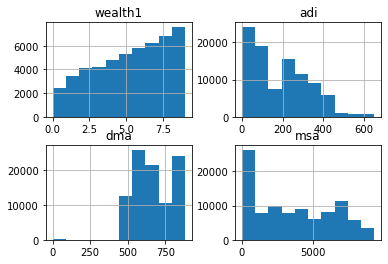

In [27]:
# Checking distributions of the columns
lst = ['wealth1', 'adi', 'dma', 'msa']
data[lst].hist()

In [28]:
# Checking the nulls in each column; 
# wealth1 has too many nulls => dropping them
# adi, dma, msa => dropping only the rows
data[lst].isna().sum() 

wealth1    44732
adi          132
dma          132
msa          132
dtype: int64

In [29]:
# Dropping wealth columns
data.drop(['wealth1'], axis=1, inplace=True)

In [30]:
# Dropping other NaN rows
data[['adi', 'dma', 'msa']] = data[['adi', 'dma', 'msa']].dropna()

In [31]:
# Checking Geocode2
# There are 187 empty entries, but they are not NaNs
data['geocode2'].value_counts()

A    34616
B    28505
D    16580
C    15524
       187
Name: geocode2, dtype: int64

3.Use appropriate EDA technique where ever necessary.

In [33]:
data.describe().apply(lambda x: round(x,1))

,odatedw,tcode,dob,age,income,hit,mbcraft,mbgarden,mbbooks,mbcolect,...,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
count,95412.0,95412.0,95412.0,71747.0,74126.0,95412.0,42558.0,42558.0,42558.0,42498.0,...,95412.0,85439.0,85439.0,95412.0,95412.0,95412.0,95412.0,95412.0,95412.0,95280.0
mean,9141.4,54.2,2723.6,61.6,3.9,3.3,0.2,0.1,1.1,0.1,...,9135.7,9151.0,8.1,13.3,95778.2,0.1,0.8,0.5,1.9,31.5
std,343.5,953.8,2132.2,16.7,1.9,9.3,0.5,0.3,1.7,0.3,...,320.4,294.3,8.2,10.8,55284.6,0.2,4.4,0.5,1.1,18.8
min,8306.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7211.0,0.0,1.3,1.0,0.0,0.0,0.0,1.0,1.0
25%,8801.0,0.0,201.0,48.0,2.0,0.0,0.0,0.0,0.0,0.0,...,8810.0,8903.0,4.0,8.4,47910.8,0.0,0.0,0.0,1.0,15.0
50%,9201.0,1.0,2610.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,...,9201.0,9204.0,6.0,11.6,95681.5,0.0,0.0,1.0,2.0,32.0
75%,9501.0,2.0,4601.0,75.0,5.0,3.0,0.0,0.0,2.0,0.0,...,9409.0,9409.0,11.0,15.5,143643.5,0.0,0.0,1.0,3.0,49.0
max,9701.0,72002.0,9710.0,98.0,7.0,241.0,6.0,4.0,9.0,6.0,...,9603.0,9702.0,1088.0,1000.0,191779.0,1.0,200.0,1.0,4.0,62.0


In [34]:
data.corr()

,odatedw,tcode,dob,age,income,hit,mbcraft,mbgarden,mbbooks,mbcolect,...,fistdate,nextdate,timelag,avggift,controln,target_b,target_d,hphone_d,rfa_2f,cluster2
odatedw,1.000000,-0.033214,0.099450,-0.309158,0.092271,-0.070752,-0.018143,-0.038262,-0.008881,-0.024914,...,0.976866,0.967057,-0.087904,0.216869,0.079036,-0.032270,-0.006948,-0.073435,-0.065082,-0.060178
tcode,-0.033214,1.000000,-0.003527,0.011079,-0.005683,-0.002897,-0.001160,-0.006312,-0.004113,-0.003759,...,-0.033189,-0.028885,0.004964,-0.005778,-0.001920,0.004941,0.000158,-0.002025,0.007835,0.001131
dob,0.099450,-0.003527,1.000000,-0.999753,0.237440,0.023451,0.015087,-0.012335,-0.004846,-0.049127,...,0.098443,0.117962,0.020849,0.020828,-0.023648,-0.001703,0.002754,0.076916,-0.048517,-0.089878
age,-0.309158,0.011079,-0.999753,1.000000,-0.250397,0.124108,0.007102,0.025609,0.039956,0.074211,...,-0.307190,-0.307045,-0.009806,-0.089998,-0.029013,0.009080,0.002282,0.096668,0.058292,0.057309
income,0.092271,-0.005683,0.237440,-0.250397,1.000000,0.004738,-0.007168,-0.035434,0.007814,0.018775,...,0.091900,0.095260,0.025956,0.114931,0.066211,0.018688,0.032063,-0.029094,-0.079972,-0.375648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
target_b,-0.032270,0.004941,-0.001703,0.009080,0.018688,0.006189,0.013282,-0.000734,0.001055,-0.002975,...,-0.032701,-0.025660,-0.010628,-0.032444,0.013165,1.000000,0.774232,-0.002626,0.072311,-0.016400
target_d,-0.006948,0.000158,0.002754,0.002282,0.032063,0.006648,0.008369,-0.003563,0.005867,0.000647,...,-0.007532,-0.004295,0.003612,0.044299,0.013366,0.774232,1.000000,-0.002432,0.000905,-0.029087
hphone_d,-0.073435,-0.002025,0.076916,0.096668,-0.029094,0.213498,0.018020,0.013237,0.026608,0.003245,...,-0.071569,-0.064820,0.008872,-0.044323,-0.108747,-0.002626,-0.002432,1.000000,0.007607,-0.018316
rfa_2f,-0.065082,0.007835,-0.048517,0.058292,-0.079972,-0.000448,0.014721,0.005762,-0.013780,-0.010464,...,-0.068630,0.044171,-0.132972,-0.277168,-0.016545,0.072311,0.000905,0.007607,1.000000,0.043062
